In [1]:
pip install matplotlib seaborn scikit-learn pandas numpy catboost optuna shap lofo-importance


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached catboost-1.2.8-cp313-cp313-win_amd64.whl.metadata (1.5 kB)
  Using cached optuna-4.6.0-py3-none-any.whl.metadata (17 kB)
  Using cached shap-0.50.0-cp313-cp313-win_amd64.whl.metadata (25 kB)
  Using cached lofo_importance-0.3.5-py3-none-any.whl.metadata (6.8 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached colorlog-6.10.1-py3-none-any.whl.metadata (11 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.62.1-cp313-cp313-win_amd64.whl.metadata (2.9 kB)
  Using cached cloudpickle-3.1.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached llvmlite-0.45.1-cp313-cp313-win_amd64.whl.metadata (5.0 kB)
  Using cached narwhals-2.12.0-py3-none-any.whl.metadata (11 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    cross_val_score
)
from sklearn.metrics import roc_auc_score
from lofo import LOFOImportance, Dataset as LOFO_Dataset, plot_importance
import optuna
import shap


In [3]:
application_test_direction=r"C:\Users\oğuzhan\Desktop\case-study\case-study\home-credit-default-risk\application_test.csv"
application_test = pd.read_csv(application_test_direction,)

In [4]:
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [5]:
application_train_direction=r"C:\Users\oğuzhan\Desktop\case-study\case-study\home-credit-default-risk\application_train.csv"
application_train = pd.read_csv(application_train_direction,)

In [5]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application_train.head()
application_train.info()
application_train.isnull().sum().sort_values(ascending=False).head(20)
application_train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
missing = application_train.isnull().sum().sort_values(ascending=False)
percent = (application_train.isnull().sum() / len(application_train) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({'missing_count': missing, 'missing_percent': percent})
missing_df.head(20)


,missing_count,missing_percent
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


In [8]:
cat_cols = application_train.select_dtypes(include=['object']).columns
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

df_le = application_train.copy()

label_encoders = {}  # Sonradan inverse transform için gerekli

for col in cat_cols:
    le = LabelEncoder()
    df_le[col] = df_le[col].astype(str)  # NaN ve kategoriler için güvenli
    df_le[col] = le.fit_transform(df_le[col])
    label_encoders[col] = le

df_le.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    initial_strategy='median',
    imputation_order='ascending',
    random_state=42
)

df_imputed = imputer.fit_transform(df_le)

df_imputed = pd.DataFrame(df_imputed, columns=df_le.columns)

df_imputed.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003.0,0.0,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004.0,0.0,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006.0,0.0,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.004125,0.005844,0.039374,0.197952,0.277668,2.153276
4,100007.0,0.0,0.0,1.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
X = df_imputed.drop(columns=['TARGET'])
y = df_imputed['TARGET']

X.shape, y.shape


((307511, 121), (307511,))

In [12]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print("Fold:", fold, 
          "| Train size:", len(train_idx), 
          "| Validation size:", len(val_idx))


Fold: 0 | Train size: 246008 | Validation size: 61503
Fold: 1 | Train size: 246009 | Validation size: 61502
Fold: 2 | Train size: 246009 | Validation size: 61502
Fold: 3 | Train size: 246009 | Validation size: 61502
Fold: 4 | Train size: 246009 | Validation size: 61502


In [13]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

cat_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        loss_function='Logloss',
        verbose=False,
        random_seed=42
    )

    model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

    preds = model.predict_proba(X_val)[:, 1]
    score = roc_auc_score(y_val, preds)
    cat_scores.append(score)
    print(f"Fold {fold} ROC-AUC: {score:.4f}")

print("\nCatBoost Mean ROC-AUC:", sum(cat_scores)/len(cat_scores))


Fold 0 ROC-AUC: 0.9298
Fold 1 ROC-AUC: 0.9333
Fold 2 ROC-AUC: 0.9302
Fold 3 ROC-AUC: 0.9297
Fold 4 ROC-AUC: 0.9305

CatBoost Mean ROC-AUC: 0.9307146242760815


In [14]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler

ridge_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s = scaler.transform(X_val)

    model = RidgeClassifier()
    model.fit(X_train_s, y_train)

    preds = model.decision_function(X_val_s)
    score = roc_auc_score(y_val, preds)
    ridge_scores.append(score)
    print(f"Fold {fold} ROC-AUC: {score:.4f}")

print("\nRidge Mean ROC-AUC:", sum(ridge_scores)/len(ridge_scores))


Fold 0 ROC-AUC: 0.7825
Fold 1 ROC-AUC: 0.7930
Fold 2 ROC-AUC: 0.7858
Fold 3 ROC-AUC: 0.7900
Fold 4 ROC-AUC: 0.7808

Ridge Mean ROC-AUC: 0.7864047409455731


In [18]:
pip install lofo-importance


Note: you may need to restart the kernel to use updated packages.


In [25]:
from lofo import LOFOImportance, Dataset, plot_importance

In [16]:
from catboost import CatBoostClassifier

best_cat_model = CatBoostClassifier(
    depth=8,
    learning_rate=0.05,
    iterations=1500,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=False
)

best_cat_model.fit(X, y)


In [28]:
from lofo import LOFOImportance, Dataset, plot_importance
from catboost import CatBoostClassifier

# 1) LOFO için TARGET dahil tek dataframe oluştur
df_lofo = df_imputed.copy()  # TARGET zaten içinde

# 2) Feature isimlerini çıkar
feature_names = df_lofo.columns.tolist()
feature_names.remove("TARGET")

# 3) LOFO Dataset oluştur
lofo_dataset = Dataset(
    df=df_lofo,
    target="TARGET",
    features=feature_names
)

# 4) Hızlı CatBoost modeli (LOFO için optimize edildi)
lofo_model = CatBoostClassifier(
    depth=3,
    iterations=100,
    learning_rate=0.1,
    loss_function="Logloss",
    verbose=False,
    random_seed=42
)

# 5) LOFO importance hesaplama (çok hızlı mod)
lofo = LOFOImportance(
    dataset=lofo_dataset,
    model=lofo_model,
    scoring="roc_auc",
    n_jobs=-1
)

importance_df = lofo.get_importance()

# 6) Sonuçları gör
importance_df.head()


100%|██████████| 121/121 [52:21<00:00, 25.96s/it]


,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
9,EXT_SOURCE_3,0.027658,0.003536,0.025827,0.022993,0.032288,0.029523
58,EXT_SOURCE_1,0.009268,0.001095,0.009386,0.007710,0.009177,0.010799
91,NONLIVINGAREA_MODE,0.007836,0.002001,0.010462,0.007904,0.008143,0.004834
93,NONLIVINGAPARTMENTS_MODE,0.006638,0.003583,0.008210,0.008871,0.009018,0.000454
37,EXT_SOURCE_2,0.005088,0.000755,0.004982,0.006007,0.003942,0.005421


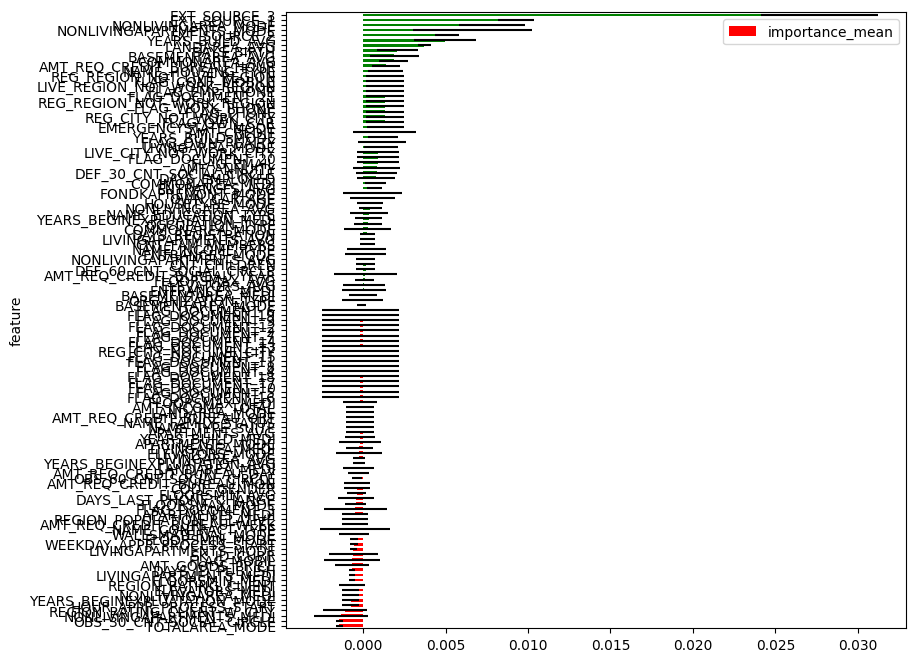

In [29]:
plot_importance(importance_df)

In [30]:
low_importance_features = importance_df[
    importance_df["importance_mean"] < 0.001
]["feature"].tolist()

print("Silinecek düşük önem düzeyindeki features:", len(low_importance_features))

X_reduced = X.drop(columns=low_importance_features)


Silinecek düşük önem düzeyindeki features: 94


In [31]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, valid_idx in kf.split(X_reduced, y):
    model = CatBoostClassifier(
        iterations=400,
        depth=4,
        learning_rate=0.05,
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=False
    )

    model.fit(
        X_reduced.iloc[train_idx], y.iloc[train_idx],
        eval_set=(X_reduced.iloc[valid_idx], y.iloc[valid_idx])
    )

    preds = model.predict_proba(X_reduced.iloc[valid_idx])[:,1]
    score = roc_auc_score(y.iloc[valid_idx], preds)
    scores.append(score)

print("Yeni ortalama AUC:", sum(scores)/len(scores))


Yeni ortalama AUC: 0.9136551806255614


In [33]:
importance_sorted = importance_df.sort_values(by="importance_mean", ascending=False)
top_features = importance_sorted.head(50)["feature"].tolist()

print("Kullanılacak feature sayısı:", len(top_features))


Kullanılacak feature sayısı: 50


In [34]:
X_reduced = X[top_features]

In [35]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, valid_idx in kf.split(X_reduced, y):
    model = CatBoostClassifier(
        iterations=400,
        depth=4,
        learning_rate=0.05,
        loss_function="Logloss",
        eval_metric="AUC",
        verbose=False
    )

    model.fit(
        X_reduced.iloc[train_idx], y.iloc[train_idx],
        eval_set=(X_reduced.iloc[valid_idx], y.iloc[valid_idx])
    )

    preds = model.predict_proba(X_reduced.iloc[valid_idx])[:,1]
    score = roc_auc_score(y.iloc[valid_idx], preds)
    scores.append(score)

print("Yeni ortalama AUC:", sum(scores)/len(scores))


Yeni ortalama AUC: 0.9194827180747212


In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

selected_features = importance_df["feature"].tolist()

# LOFO sonrası X dataset
X_lofo = X[selected_features]

# Target zaten df_imputed içinde mevcut
y = df_imputed["TARGET"]

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 300, 1200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "depth": trial.suggest_int("depth", 3, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 10.0),
        "random_strength": trial.suggest_float("random_strength", 0.1, 10.0),
        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "verbose": False,
        "task_type": "CPU",
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_seed": 42
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []

    for train_idx, valid_idx in cv.split(X_lofo, y):
        X_train, X_valid = X_lofo.iloc[train_idx], X_lofo.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = CatBoostClassifier(**params)
        model.fit(X_train, y_train)

        preds = model.predict_proba(X_valid)[:, 1]
        auc_scores.append(roc_auc_score(y_valid, preds))

    return np.mean(auc_scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best Params:")
print(study.best_params)
print("Best AUC:", study.best_value)


[I 2025-12-01 17:19:40,526] A new study created in memory with name: no-name-1b2728d3-dc93-4c77-bcbf-425e1c9bde36
[I 2025-12-01 17:20:32,571] Trial 0 finished with value: 0.9604604083942693 and parameters: {'iterations': 529, 'learning_rate': 0.144476504448557, 'depth': 7, 'l2_leaf_reg': 3.7690148564388144, 'bagging_temperature': 6.559154127612916, 'random_strength': 8.871127199180092, 'border_count': 101}. Best is trial 0 with value: 0.9604604083942693.
[I 2025-12-01 17:21:13,406] Trial 1 finished with value: 0.9380777237873522 and parameters: {'iterations': 440, 'learning_rate': 0.05683774521728306, 'depth': 6, 'l2_leaf_reg': 3.4462056929224496, 'bagging_temperature': 4.988889148302453, 'random_strength': 8.927235108054363, 'border_count': 161}. Best is trial 0 with value: 0.9604604083942693.
[I 2025-12-01 17:21:59,044] Trial 2 finished with value: 0.9599221321226878 and parameters: {'iterations': 484, 'learning_rate': 0.14565203347837952, 'depth': 7, 'l2_leaf_reg': 7.622173656304956

KeyboardInterrupt: 

In [39]:
best_params = study.best_params
best_params


{'iterations': 949,
 'learning_rate': 0.16442153920164912,
 'depth': 6,
 'l2_leaf_reg': 1.8940576361845642,
 'bagging_temperature': 0.007497917125861314,
 'random_strength': 9.788128831783368,
 'border_count': 183}

In [40]:
best_cat = CatBoostClassifier(
    **best_params,
    loss_function="Logloss",
    eval_metric="AUC",
    verbose=False,
    random_seed=42
)

best_cat.fit(X_lofo, y)


In [41]:
import shap

# CatBoost modelimizde SHAP değerleri hesaplamak için TreeExplainer kullanacağız
explainer = shap.TreeExplainer(best_cat)
shap_values = explainer.shap_values(X_lofo)


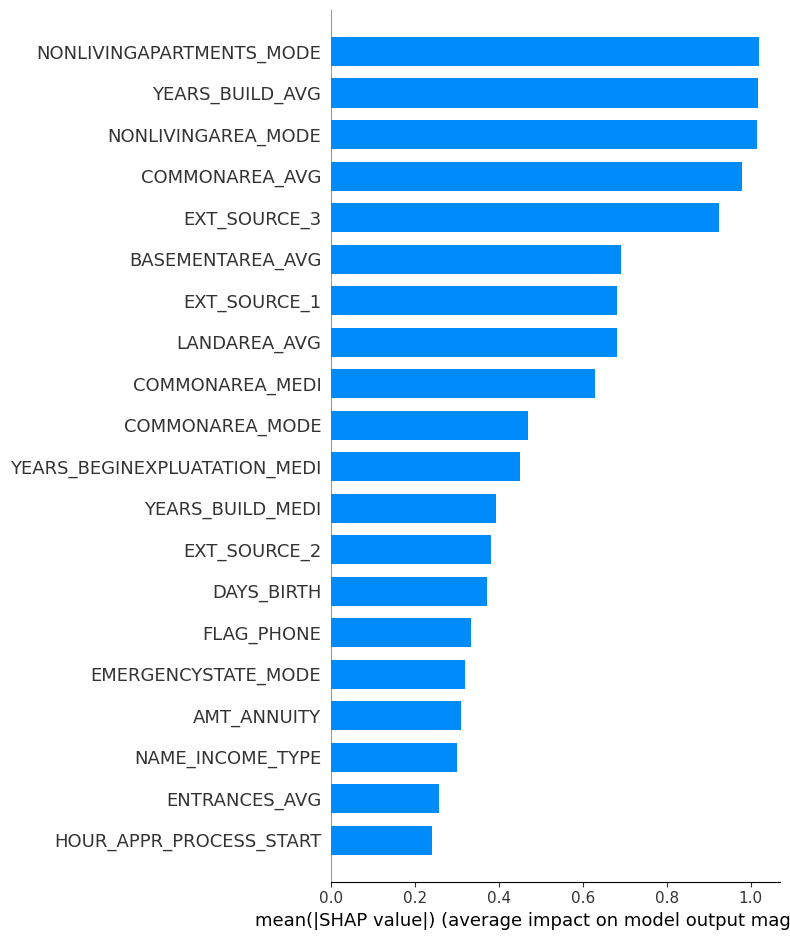

In [42]:
# Tüm feature'ların önemini ve etkisini özetleyen plot
shap.summary_plot(shap_values, X_lofo, plot_type="bar")


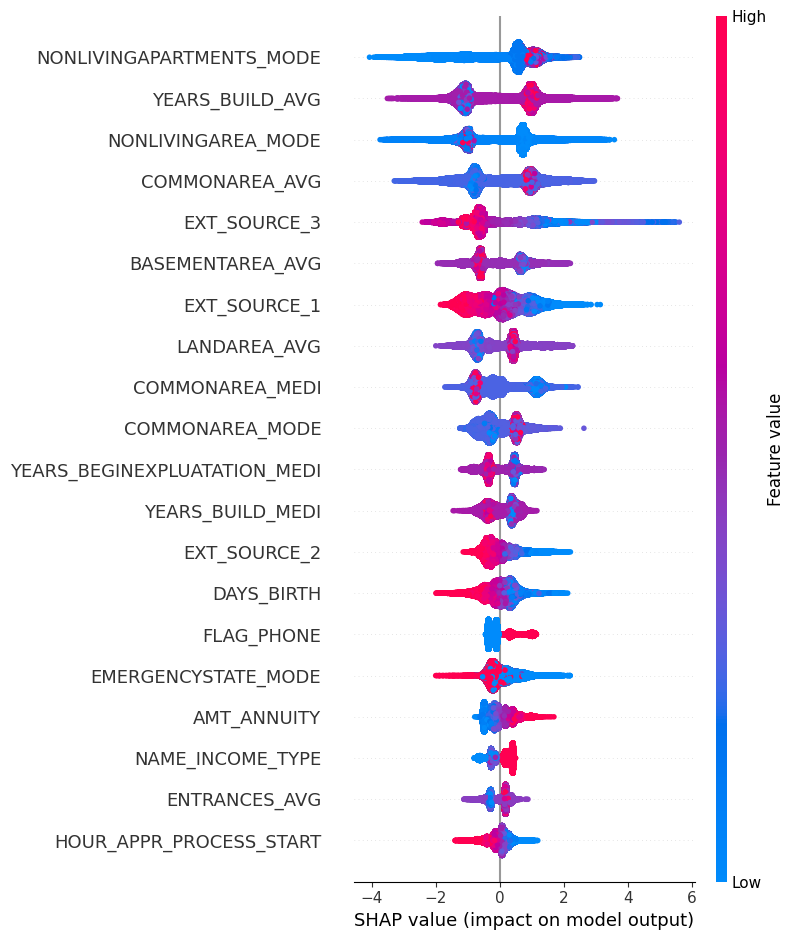

In [43]:
# Detaylı summary plot (renkler feature değerleri ile ilişkilidir)
shap.summary_plot(shap_values, X_lofo)


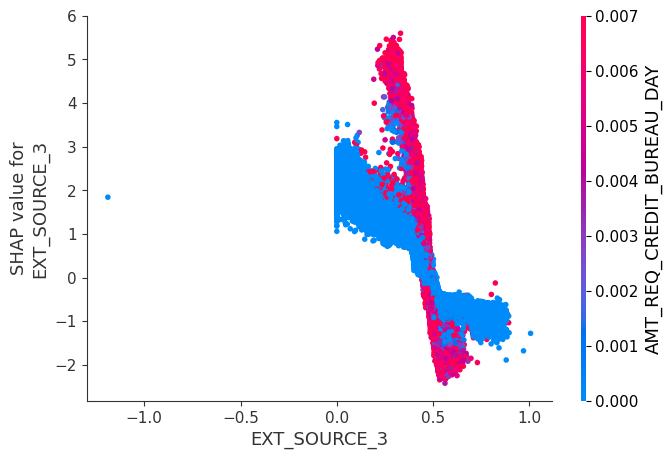

In [44]:
# Örnek: EXT_SOURCE_3 feature’ının etkisini detaylı inceleyelim
shap.dependence_plot("EXT_SOURCE_3", shap_values, X_lofo)


In [47]:
import shap

shap.initjs()  # JavaScript'i yükler

i = 0
shap.force_plot(explainer.expected_value, shap_values[i,:], X_lofo.iloc[i,:])

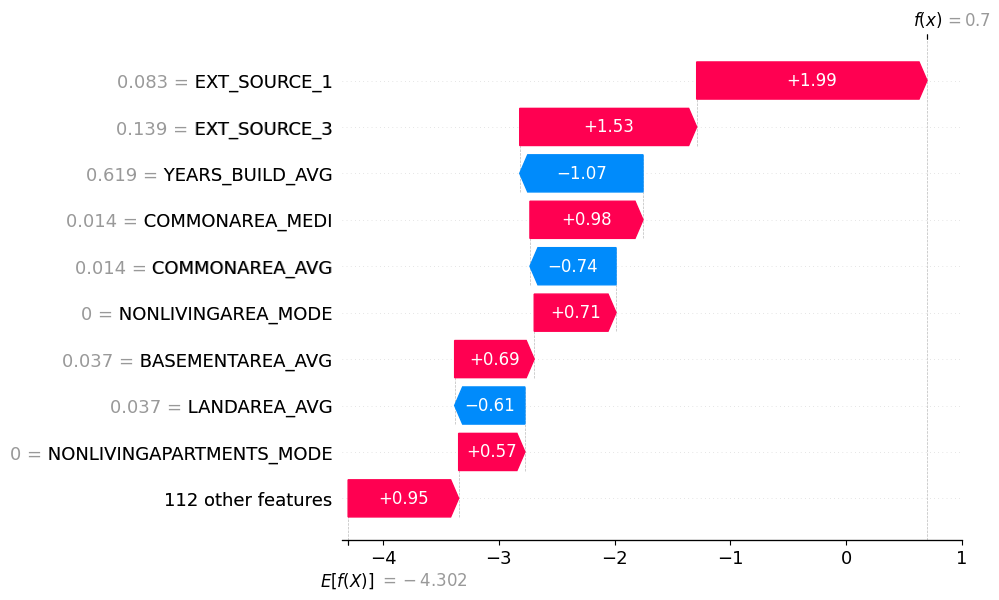

In [48]:
# Statik (matplotlib) plot alternatifi
shap.waterfall_plot(shap.Explanation(values=shap_values[i,:], 
                                     base_values=explainer.expected_value, 
                                     data=X_lofo.iloc[i,:]))

In [49]:
# SHAP değerlerinin ortalamasına göre feature önem sıralaması
shap_importance = pd.DataFrame({
    "feature": X_lofo.columns,
    "shap_mean": np.abs(shap_values).mean(axis=0)
}).sort_values(by="shap_mean", ascending=False)

shap_importance.head(20)


,feature,shap_mean
3,NONLIVINGAPARTMENTS_MODE,1.018777
5,YEARS_BUILD_AVG,1.017428
2,NONLIVINGAREA_MODE,1.013890
9,COMMONAREA_AVG,0.978151
0,EXT_SOURCE_3,0.923210
8,BASEMENTAREA_AVG,0.689700
1,EXT_SOURCE_1,0.682313
6,LANDAREA_AVG,0.681481
33,COMMONAREA_MEDI,0.628360
42,COMMONAREA_MODE,0.468907


In [50]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

def ridge_objective(trial):
    alpha = trial.suggest_float("alpha", 0.01, 10.0)
    
    auc_scores = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    for train_idx, val_idx in skf.split(X_lofo, y):
        X_train, X_val = X_lofo.iloc[train_idx], X_lofo.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train)
        X_val_s = scaler.transform(X_val)

        model = RidgeClassifier(alpha=alpha)
        model.fit(X_train_s, y_train)

        preds = model.decision_function(X_val_s)
        auc_scores.append(roc_auc_score(y_val, preds))
    
    return np.mean(auc_scores)


In [51]:
study_ridge = optuna.create_study(direction="maximize")
study_ridge.optimize(ridge_objective, n_trials=20)

print("Best Ridge Alpha:", study_ridge.best_params)
print("Best Ridge AUC:", study_ridge.best_value)


[I 2025-12-01 18:27:08,486] A new study created in memory with name: no-name-df4ce5c0-a38c-4712-92f3-7dfc481acfd6
[I 2025-12-01 18:27:11,934] Trial 0 finished with value: 0.7864017705965896 and parameters: {'alpha': 1.3063038231866266}. Best is trial 0 with value: 0.7864017705965896.
[I 2025-12-01 18:27:15,443] Trial 1 finished with value: 0.7863682560104767 and parameters: {'alpha': 4.695164731457201}. Best is trial 0 with value: 0.7864017705965896.
[I 2025-12-01 18:27:18,990] Trial 2 finished with value: 0.7863748115835862 and parameters: {'alpha': 4.033537280648899}. Best is trial 0 with value: 0.7864017705965896.
[I 2025-12-01 18:27:22,420] Trial 3 finished with value: 0.7863284394925826 and parameters: {'alpha': 9.147177718055321}. Best is trial 0 with value: 0.7864017705965896.
[I 2025-12-01 18:27:25,950] Trial 4 finished with value: 0.7863536208599443 and parameters: {'alpha': 6.238451007670564}. Best is trial 0 with value: 0.7864017705965896.
[I 2025-12-01 18:27:29,442] Trial 5

Best Ridge Alpha: {'alpha': 0.038240423959864156}
Best Ridge AUC: 0.7864147912600954


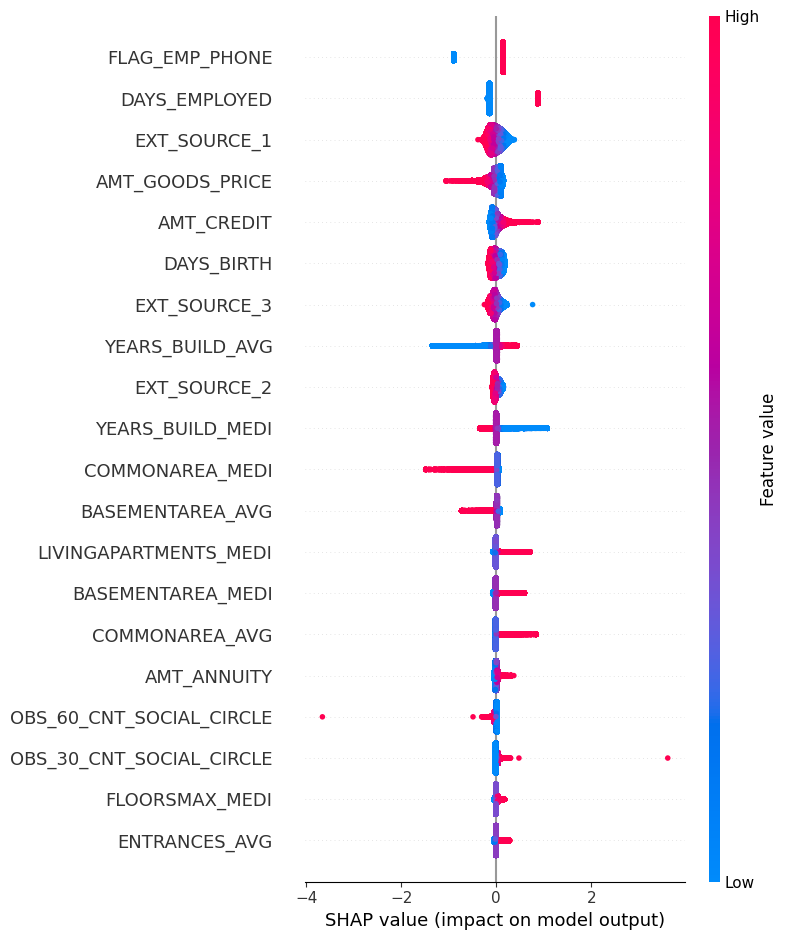

In [52]:
ridge_best = RidgeClassifier(alpha=study_ridge.best_params["alpha"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lofo)
ridge_best.fit(X_scaled, y)

explainer_ridge = shap.LinearExplainer(ridge_best, X_scaled)
shap_values_ridge = explainer_ridge.shap_values(X_scaled)

shap.summary_plot(shap_values_ridge, X_lofo)


In [53]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler

# En iyi alpha
best_alpha = 0.038240423959864156

# Ridge modeli oluştur
ridge_model = RidgeClassifier(alpha=best_alpha)

# Veriyi ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lofo)  # X_lofo: LOFO sonrası seçilmiş feature'lar

# Modeli eğit
ridge_model.fit(X_scaled, y)


RidgeClassifier(alpha=0.038240423959864156)

In [54]:
import shap

explainer_ridge = shap.LinearExplainer(ridge_model, X_scaled, feature_perturbation="interventional")
shap_values_ridge = explainer_ridge.shap_values(X_scaled)


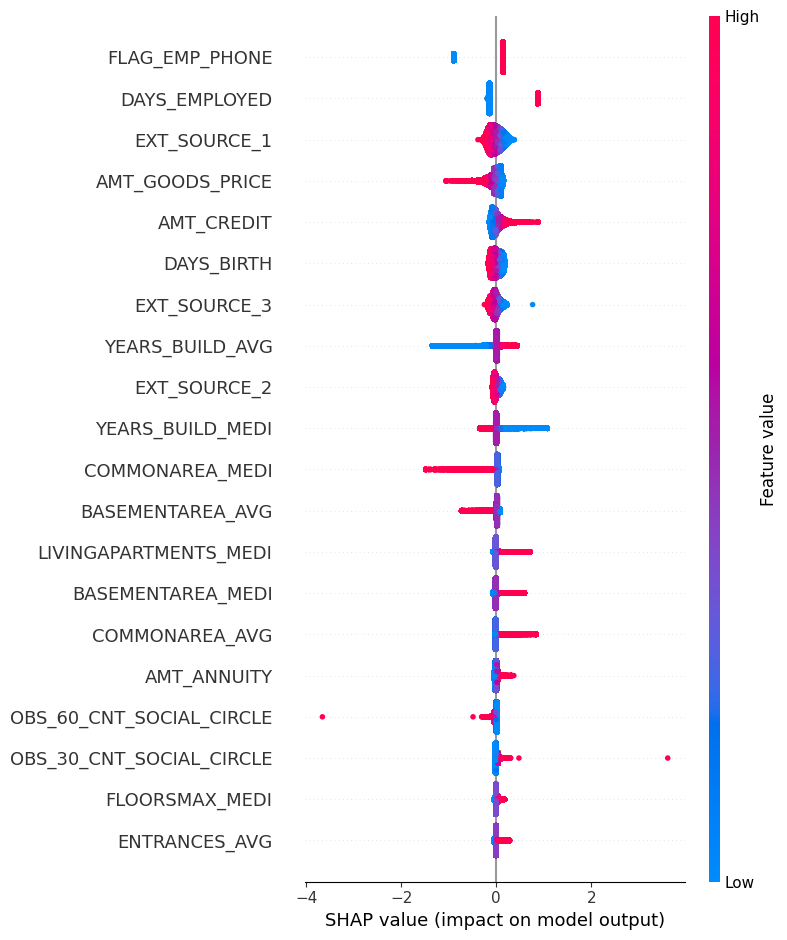

In [55]:
shap.summary_plot(shap_values_ridge, X_lofo)


1.Introduction

2.Loading the Dataset

3.Exploratory Data Analysis

4.Preprocessing Pipelines

5.Baseline Models (CatBoost & Ridge)

6.Feature Selection with LOFO

7.Hyperparameter Optimization (Optuna)

8.Model Comparison & Experiment Summary

9.SHAP Explanations

10.Feature Engineering (Optional)

11.Conclusion